<a href="https://colab.research.google.com/github/rufimelo99/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

import sklearn.decomposition
import matplotlib.pyplot as plt

## Dataset

***MNIST Dataset***

70000 Examples:

**Splited**:

* 60000 for training;

* 10000 for tests;


**10 Classes**: 

* 0, ..., 9

**Features**

* (28,28,1)

In [6]:
mnist_data, mnist_info = tfds.load('mnist', with_info=True)
#print(mnist_data)
#print(mnist_info)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


It is needed to convert into numpy arrays and normalize the images. Each pixel range from 0 to 255.0, so:

`pixels = pixels/255.0`

In [7]:
mnist_x = np.asarray([instance['image'] for instance in tfds.as_numpy(mnist_data['train'])])
mnist_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['train'])])
mnist_x= mnist_x/255.0

In [8]:
mnist_test_x = np.asarray([instance['image'] for instance in tfds.as_numpy(mnist_data['test'])])
mnist_test_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['test'])])
mnist_test_x= mnist_test_x/255.0

**Example of visualizing data:**

# Feed-Forward Networks

## Single_Layer Model




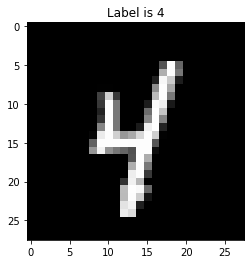

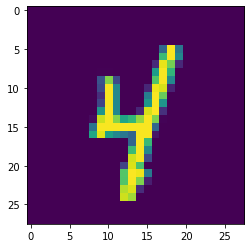

In [ ]:
def showImage(label,pixels):
  #remove the normalization
  pixels = pixels*255.0

  # Make those columns into a array of 8-bits pixels
  # This array will be of 1D with length 784
  # The pixel intensity values are integers from 0 to 255
  pixels = np.array(pixels, dtype='uint8')

  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))

  # Plot
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels, cmap='gray')
  plt.show()

showImage(mnist_y[0], mnist_x[0] )

#or this
plt.imshow(mnist_x[0].reshape(28,28))


We will start by creating a very simple network without hidden layers.

We'll use the softmax

Additionally, we request the accuracy values. To update the weights, we will use Stochastic Gradient Descent.

In [ ]:
#print(mnist_info.features['image'].shape)
#print(mnist_x.shape)
#print(mnist_y.shape)

single_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])


In [ ]:
single_layer_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
single_layer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
output (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
single_layer_model.save_weights('single_layer_init.h5')

In [ ]:
single_layer_train = single_layer_model.fit(mnist_x, mnist_y, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1081 - accuracy: 0.7332
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8766
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4100 - accuracy: 0.8895
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3790 - accuracy: 0.8979
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3610 - accuracy: 0.9004
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3455 - accuracy: 0.9041
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3371 - accuracy: 0.9054
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3322 - accuracy: 0.9065
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3266 - accuracy: 0.9098
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

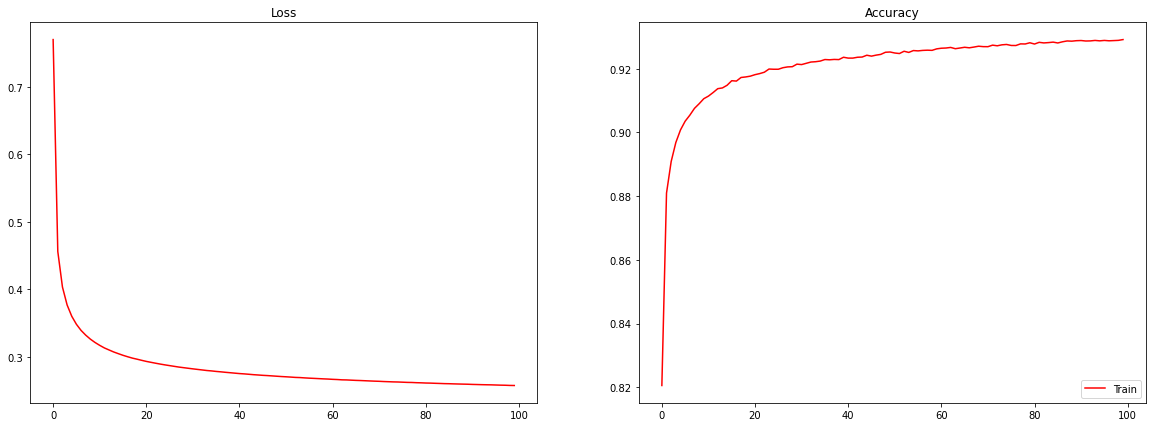

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(single_layer_train.history['loss'], '-r', label='Train')

acc_ax.set_title('Accuracy')
acc_ax.plot(single_layer_train.history['accuracy'], '-r', label='Train')

plt.legend(loc=4)
plt.show()

In [ ]:
predictions = single_layer_model.predict(mnist_x[:5])
print(predictions)
np.argmax(predictions, axis=1)

[[1.2360556e-05 2.1258623e-03 8.3185756e-04 2.9866686e-04 9.5986402e-01
  5.7751280e-03 9.9393064e-03 5.5824954e-04 1.2017682e-02 8.5768020e-03]
 [2.5045298e-07 9.4995683e-01 3.5030795e-03 3.4579826e-03 1.8669767e-04
  1.1402231e-04 2.0659034e-05 3.9825663e-02 1.8851327e-03 1.0497258e-03]
 [9.9923503e-01 1.5813506e-13 4.0597060e-05 1.9495912e-05 1.3647322e-08
  4.0777473e-04 2.8818517e-04 8.7680319e-10 8.6525451e-06 2.4201026e-07]
 [9.6791864e-06 3.1415520e-13 1.2905656e-06 1.8719883e-06 1.7665755e-07
  2.8452062e-06 2.6656144e-10 9.9983168e-01 1.4521349e-06 1.5083780e-04]
 [1.6784114e-04 6.4666443e-07 3.1942122e-03 3.6591992e-02 3.9008963e-05
  9.5556015e-03 2.9838707e-06 5.7092357e-06 9.4947898e-01 9.6303900e-04]]


array([4, 1, 0, 7, 8])

In [ ]:
loss, acc = single_layer_model.evaluate(mnist_x, mnist_y)
print('Accuracy: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2623 - accuracy: 0.9275
Accuracy: 0.9274500012397766


In [ ]:
single_layer_model.load_weights('single_layer_init.h5')

In [ ]:
single_layer_train = single_layer_model.fit(mnist_x, mnist_y, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8309 - accuracy: 0.8079 - val_loss: 0.5400 - val_accuracy: 0.8670
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4829 - accuracy: 0.8752 - val_loss: 0.4472 - val_accuracy: 0.8823
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4227 - accuracy: 0.8872 - val_loss: 0.4091 - val_accuracy: 0.8903
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3925 - accuracy: 0.8933 - val_loss: 0.3870 - val_accuracy: 0.8939
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3734 - accuracy: 0.8978 - val_loss: 0.3726 - val_accuracy: 0.8970
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.9009 - val_loss: 0.3613 - val_accuracy: 0.8994
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3499 - accuracy: 0.9028 - val_loss: 0.3533 - val_ac

In [ ]:
predictions=single_layer_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = single_layer_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = single_layer_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2625 - accuracy: 0.9275
Accuracy for the training set: 0.9274666905403137
313/313 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.9246
Accuracy for the testing set: 0.9246000051498413


Predicted Label:  9
Actual Label:  2


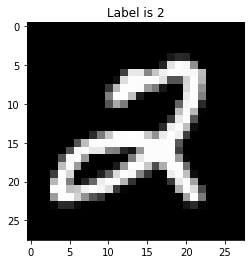

In [ ]:
#Example
print("Predicted Label: " , predictedClasses[0])
print("Actual Label: " , mnist_test_y[0])
showImage(mnist_test_y[0],mnist_test_x[0] )

## Multi-Layer Model

In [ ]:
multi_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation='tanh', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
output (Dense)               (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_best.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
multi_layer_train = multi_layer_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0098 - accuracy: 0.7323 - val_loss: 0.4180 - val_accuracy: 0.8870

Epoch 00001: val_accuracy improved from -inf to 0.88700, saving model to multi_layer_best.h5
Epoch 2/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3842 - accuracy: 0.8939 - val_loss: 0.3534 - val_accuracy: 0.9018

Epoch 00002: val_accuracy improved from 0.88700 to 0.90175, saving model to multi_layer_best.h5
Epoch 3/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3352 - accuracy: 0.9043 - val_loss: 0.3249 - val_accuracy: 0.9072

Epoch 00003: val_accuracy improved from 0.90175 to 0.90725, saving model to multi_layer_best.h5
Epoch 4/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3128 - accuracy: 0.9112 - val_loss: 0.3070 - val_accuracy: 0.9123

Epoch 00004: val_accuracy improved from 0.90725 to 0.91233, saving model to multi_layer_best.h5
Epoch 5/10000
1500/1500 [==

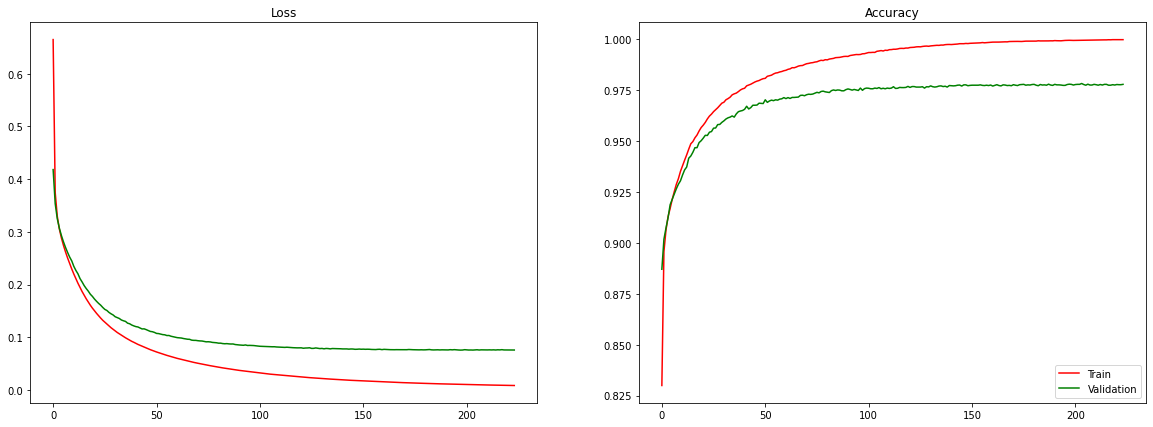

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show()

Regularization


In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation='tanh',  kernel_regularizer=tf.keras.regularizers.l2(0.01), name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
output (Dense)               (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 3.7732 - accuracy: 0.7496 - val_loss: 2.2527 - val_accuracy: 0.8870

Epoch 00001: val_accuracy improved from -inf to 0.88700, saving model to multi_layer_reg_best.h5
Epoch 2/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.0035 - accuracy: 0.8918 - val_loss: 1.4225 - val_accuracy: 0.9007

Epoch 00002: val_accuracy improved from 0.88700 to 0.90067, saving model to multi_layer_reg_best.h5
Epoch 3/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2873 - accuracy: 0.9025 - val_loss: 0.9734 - val_accuracy: 0.9068

Epoch 00003: val_accuracy improved from 0.90067 to 0.90675, saving model to multi_layer_reg_best.h5
Epoch 4/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8961 - accuracy: 0.9055 - val_loss: 0.7230 - val_accuracy: 0.9093

Epoch 00004: val_accuracy improved from 0.90675 to 0.90925, saving model to multi_layer_reg_best.h5
Epoch 5/100

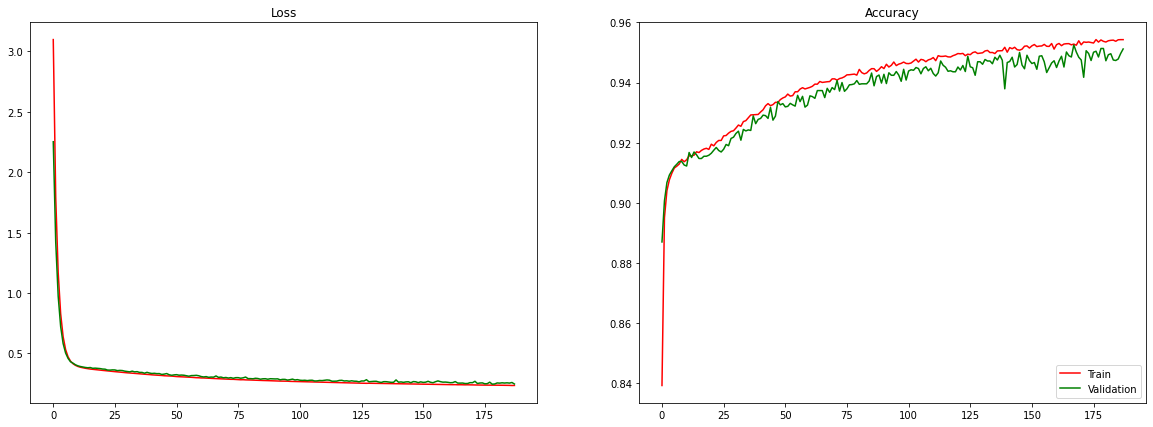

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show()

## Comparations neurons

The aspects that are required to be compared in Feed-Forward Neural Networks:

* Number of neurons in the hidden layer
* Activation function of the hidden layer
* Number of hidden layers
* No regularization vs L1/L2 regularization

First thing first, it is good to note that having multiple layers perceptron, helps in getting knowledge when it comes to non-linear relations. If a problem has mostly linear relations, a perceptron model with only an input and output layer would probably be enough.

In this context, we have a set of images. Not all the images are well-centered or have the same amount of brightness. This might be a reason why multi-layer model might be beneficial.

Also, the number of Hidden Units usually varies between the number of units in the input layer and the output layer

### 700 Hidden Units w/ Softmax
0.8257

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(700, activation='softmax', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 700)               549500    
_________________________________________________________________
output (Dense)               (None, 10)                7010      
Total params: 556,510
Trainable params: 556,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3019 - accuracy: 0.1137 - val_loss: 2.3009 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3009 - accuracy: 0.1142 - val_loss: 2.3007 - val_accuracy: 0.1128

Epoch 00002: val_accuracy did not improve from 0.11275
Epoch 3/10000
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3011 - accuracy: 0.1108 - val_loss: 2.3006 - val_accuracy: 0.1128

Epoch 00003: val_accuracy did not improve from 0.11275
Epoch 4/10000
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3009 - accuracy: 0.1123 - val_loss: 2.3005 - val_accuracy: 0.1128

Epoch 00004: val_accuracy did not improve from 0.11275
Epoch 5/10000
1500/1500 [==============================] - 7s 5ms/step - loss: 2.3008 - accuracy: 0.1125 - val_loss: 2.3004 - val_accuracy

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5604 - accuracy: 0.8284
Accuracy for the training set: 0.8283500075340271
313/313 [==============================] - 1s 3ms/step - loss: 0.5814 - accuracy: 0.8257
Accuracy for the testing set: 0.8256999850273132


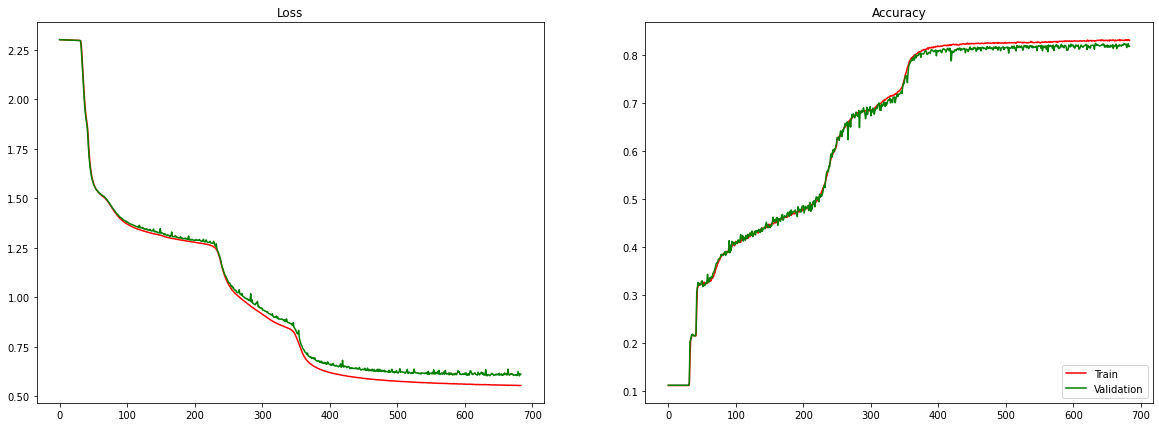

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 400 Hidden Units w/ Softmax
accuracy: 0.9188

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(400, activation='softmax', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 400)               314000    
_________________________________________________________________
output (Dense)               (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Streaming output truncated to the last 5000 lines.
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3395 - accuracy: 0.4173 - val_loss: 1.3502 - val_accuracy: 0.4217

Epoch 00048: val_accuracy did not improve from 0.42200
Epoch 49/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3381 - accuracy: 0.4263 - val_loss: 1.3478 - val_accuracy: 0.4144

Epoch 00049: val_accuracy did not improve from 0.42200
Epoch 50/10000
1500/1500 [==============================] - 5s 4ms/step - loss: 1.3361 - accuracy: 0.4184 - val_loss: 1.3471 - val_accuracy: 0.4238

Epoch 00050: val_accuracy improved from 0.42200 to 0.42375, saving model to multi_layer_reg_best_softmax.h5
Epoch 51/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3347 - accuracy: 0.4231 - val_loss: 1.3455 - val_accuracy: 0.4230

Epoch 00051: val_accuracy did not improve from 0.42375
Epoch 52/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3332 - accura

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5604 - accuracy: 0.8284
Accuracy for the training set: 0.8283500075340271
313/313 [==============================] - 1s 4ms/step - loss: 0.5814 - accuracy: 0.8257
Accuracy for the testing set: 0.8256999850273132


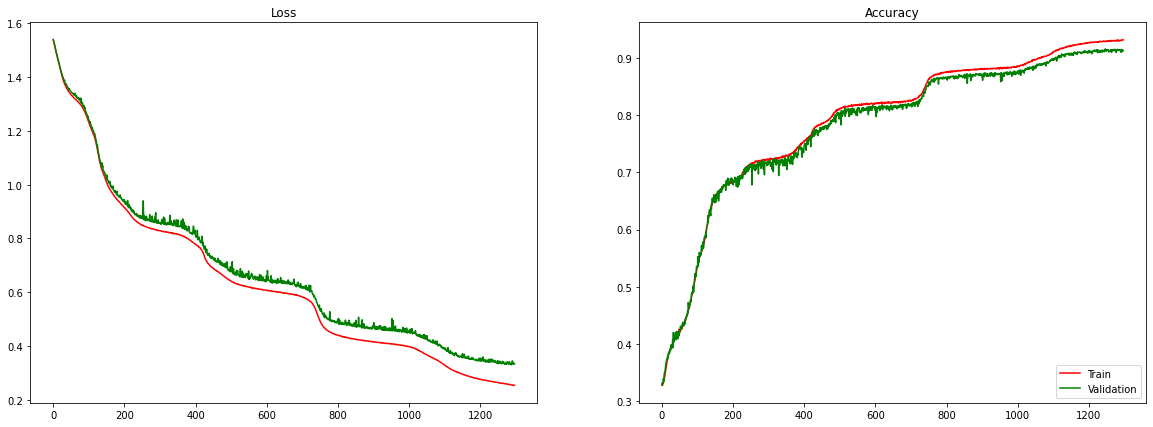

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 200 Hidden Units w/ Softmax
accuracy: 0.8486

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation='softmax', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
output (Dense)               (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3020 - accuracy: 0.1144 - val_loss: 2.3002 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3000 - accuracy: 0.1139 - val_loss: 2.2991 - val_accuracy: 0.1128

Epoch 00002: val_accuracy did not improve from 0.11275
Epoch 3/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2994 - accuracy: 0.1109 - val_loss: 2.2980 - val_accuracy: 0.1128

Epoch 00003: val_accuracy did not improve from 0.11275
Epoch 4/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2977 - accuracy: 0.1113 - val_loss: 2.2968 - val_accuracy: 0.1128

Epoch 00004: val_accuracy did not improve from 0.11275
Epoch 5/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.2971 - accuracy: 0.1096 - val_loss: 2.2955 - val_accuracy

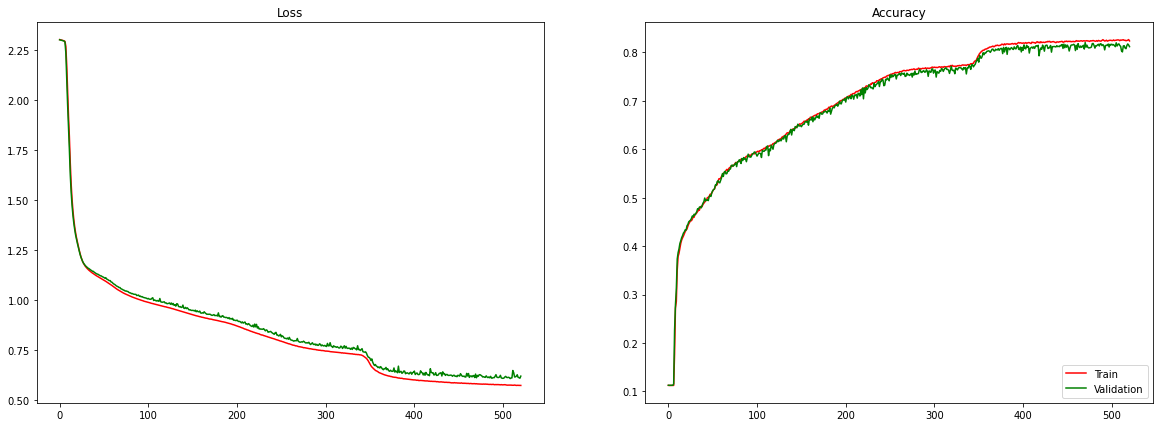

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show()

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
#from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.5805 - accuracy: 0.8238
Accuracy for the training set: 0.8238499760627747
313/313 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.8135
Accuracy for the testing set: 0.8134999871253967


### 88 Hidden Units w/ Softmax
sqrt(input layer nodes * output layer nodes)

sqrt(784*10)=88

accuracy: 0.9064

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='softmax', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
output (Dense)               (None, 10)                890       
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3007 - accuracy: 0.1122 - val_loss: 2.2963 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2950 - accuracy: 0.1117 - val_loss: 2.2855 - val_accuracy: 0.1330

Epoch 00002: val_accuracy improved from 0.11275 to 0.13300, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2719 - accuracy: 0.1682 - val_loss: 2.2119 - val_accuracy: 0.2159

Epoch 00003: val_accuracy improved from 0.13300 to 0.21592, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1851 - accuracy: 0.2440 - val_loss: 2.0879 - val_accuracy: 0.3000

Epoch 00004: val_accuracy improved from 0.21592 to 0.30000, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2883 - accuracy: 0.9205
Accuracy for the training set: 0.9204999804496765
313/313 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.9064
Accuracy for the testing set: 0.9064000248908997


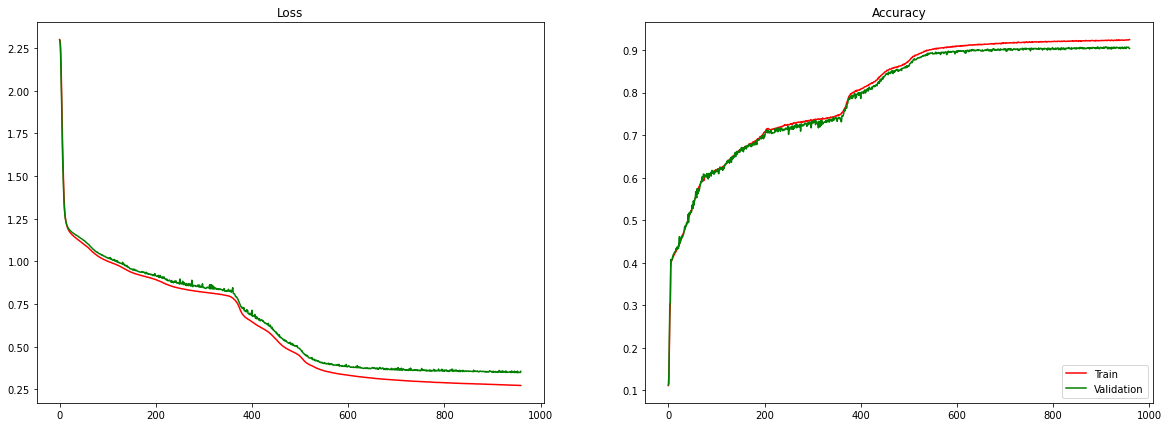

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 50 Hidden Units w/ Softmax
accuracy: 0.8769

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation='softmax', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 50)                39250     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2989 - accuracy: 0.1018 - val_loss: 2.2862 - val_accuracy: 0.1397

Epoch 00001: val_accuracy improved from -inf to 0.13967, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2800 - accuracy: 0.1695 - val_loss: 2.2437 - val_accuracy: 0.2476

Epoch 00002: val_accuracy improved from 0.13967 to 0.24758, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2160 - accuracy: 0.2853 - val_loss: 2.0796 - val_accuracy: 0.3997

Epoch 00003: val_accuracy improved from 0.24758 to 0.39967, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0196 - accuracy: 0.4061 - val_loss: 1.8649 - val_accuracy: 0.3910

Epoch 00004: val_accuracy did not improve from 0.39967
Epoch 5/10000
1500/1500 [=======

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4187 - accuracy: 0.8831
Accuracy for the training set: 0.8831166625022888
313/313 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.8769
Accuracy for the testing set: 0.8769000172615051


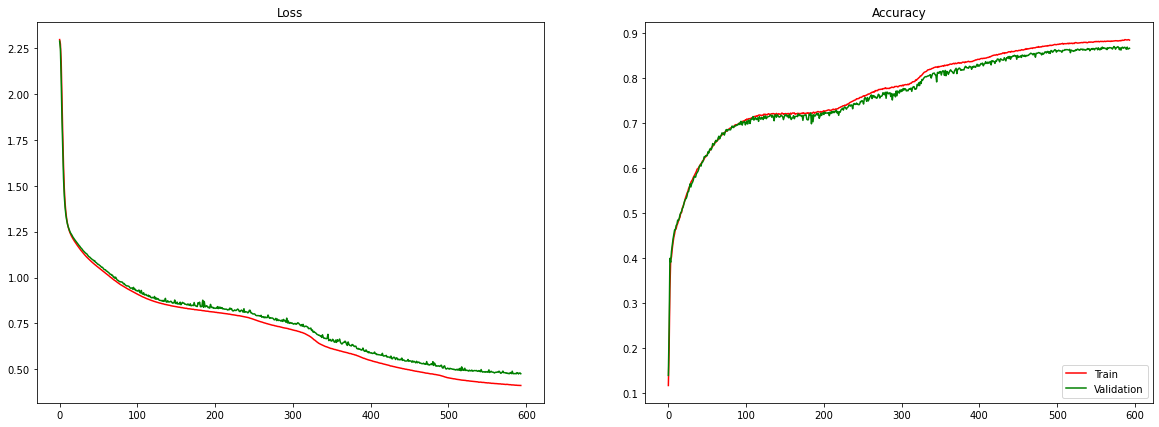

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 20 Hidden Units w/ Softmax
0.9051

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(20, activation='softmax', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 20)                15700     
_________________________________________________________________
output (Dense)               (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Streaming output truncated to the last 5000 lines.
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7352 - accuracy: 0.7705 - val_loss: 0.7661 - val_accuracy: 0.7615

Epoch 00088: val_accuracy did not improve from 0.76267
Epoch 89/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7356 - accuracy: 0.7763 - val_loss: 0.7633 - val_accuracy: 0.7642

Epoch 00089: val_accuracy improved from 0.76267 to 0.76417, saving model to multi_layer_reg_best_softmax.h5
Epoch 90/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7268 - accuracy: 0.7718 - val_loss: 0.7650 - val_accuracy: 0.7631

Epoch 00090: val_accuracy did not improve from 0.76417
Epoch 91/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7289 - accuracy: 0.7745 - val_loss: 0.7583 - val_accuracy: 0.7646

Epoch 00091: val_accuracy improved from 0.76417 to 0.76458, saving model to multi_layer_reg_best_softmax.h5
Epoch 92/10000
1500/1500 [================

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2968 - accuracy: 0.9208
Accuracy for the training set: 0.9207833409309387
313/313 [==============================] - 1s 2ms/step - loss: 0.3594 - accuracy: 0.9051
Accuracy for the testing set: 0.9050999879837036


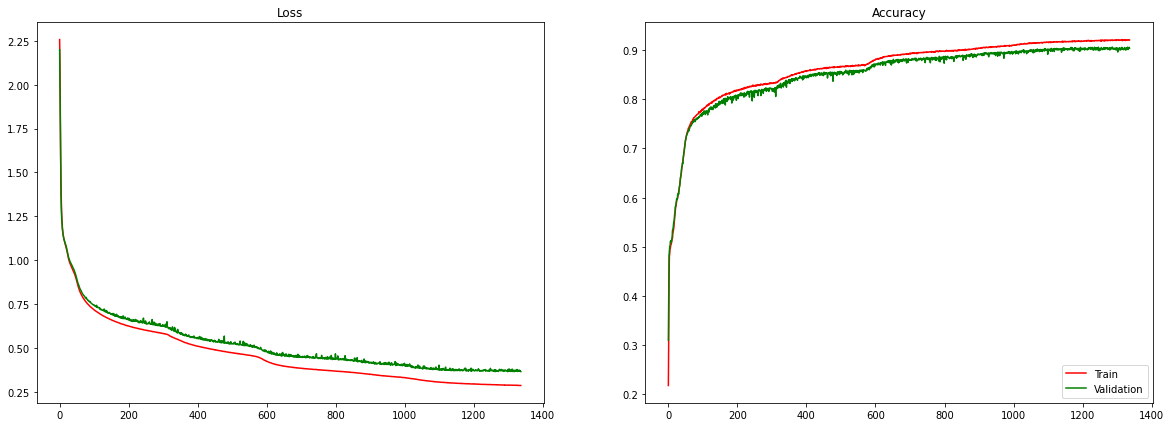

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

## Comparations activation function

### 88 Hidden Units w/ Sigmoid

accuracy: 0.9775

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
output (Dense)               (None, 10)                890       
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 1.9113 - accuracy: 0.5279 - val_loss: 1.0425 - val_accuracy: 0.8117

Epoch 00001: val_accuracy improved from -inf to 0.81175, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9169 - accuracy: 0.8235 - val_loss: 0.6794 - val_accuracy: 0.8522

Epoch 00002: val_accuracy improved from 0.81175 to 0.85225, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6405 - accuracy: 0.8540 - val_loss: 0.5442 - val_accuracy: 0.8712

Epoch 00003: val_accuracy improved from 0.85225 to 0.87117, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5252 - accuracy: 0.8725 - val_loss: 0.4749 - val_accuracy: 0.8818

Epoch 00004: val_accuracy improved from 0.87117 to 0.88183, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0424 - accuracy: 0.9900
Accuracy for the training set: 0.9900166392326355
313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9743
Accuracy for the testing set: 0.9743000268936157


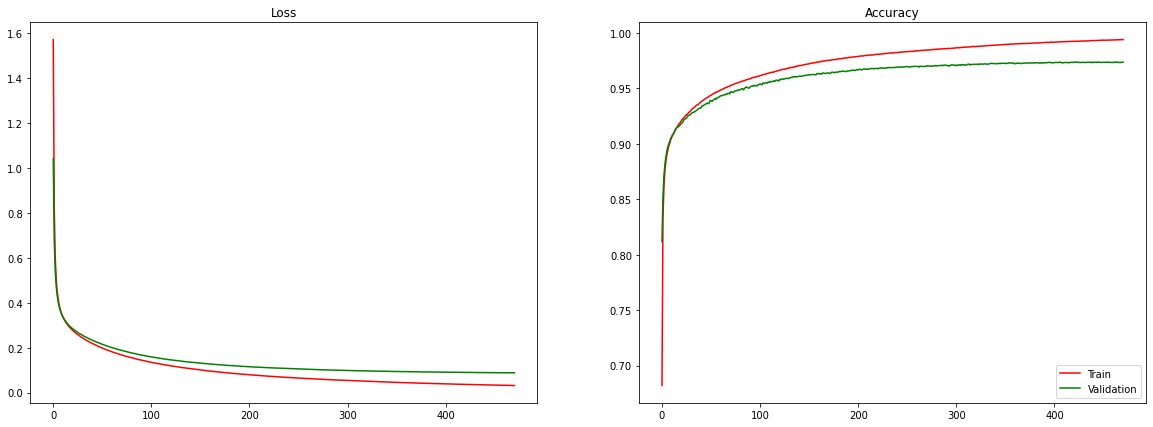

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ Tanh

accuracy: 0.9758

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='tanh', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
output (Dense)               (None, 10)                890       
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0605 - accuracy: 0.7182 - val_loss: 0.4366 - val_accuracy: 0.8840

Epoch 00001: val_accuracy improved from -inf to 0.88400, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4134 - accuracy: 0.8855 - val_loss: 0.3589 - val_accuracy: 0.8992

Epoch 00002: val_accuracy improved from 0.88400 to 0.89925, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3451 - accuracy: 0.9014 - val_loss: 0.3226 - val_accuracy: 0.9095

Epoch 00003: val_accuracy improved from 0.89925 to 0.90950, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9145 - val_loss: 0.2991 - val_accuracy: 0.9166

Epoch 00004: val_accuracy improved from 0.90950 to 0.91658, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0228 - accuracy: 0.9948
Accuracy for the training set: 0.9948333501815796
313/313 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9758
Accuracy for the testing set: 0.9757999777793884


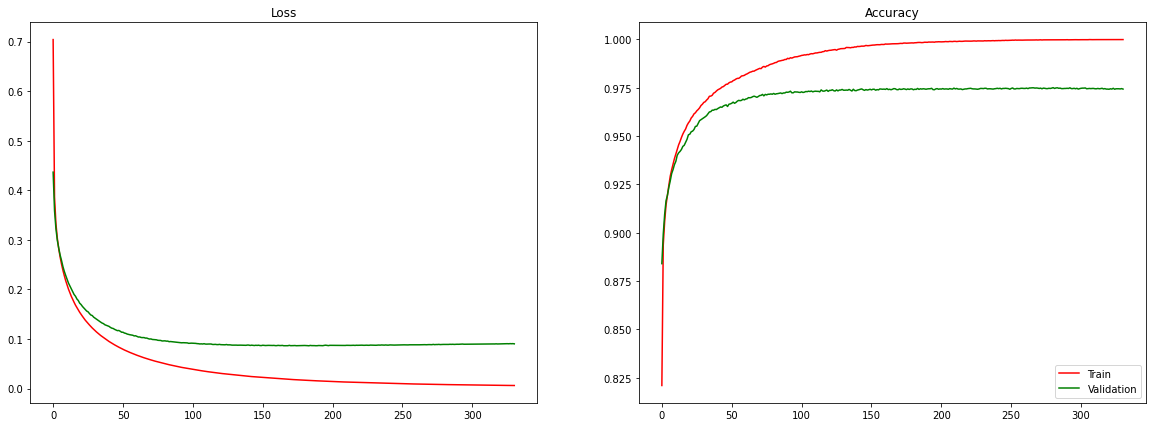

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ Relu

accuracy: 0.9764

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='relu', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
output (Dense)               (None, 10)                890       
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1277 - accuracy: 0.7132 - val_loss: 0.4085 - val_accuracy: 0.8892

Epoch 00001: val_accuracy improved from -inf to 0.88925, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3851 - accuracy: 0.8947 - val_loss: 0.3399 - val_accuracy: 0.9068

Epoch 00002: val_accuracy improved from 0.88925 to 0.90683, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.9103 - val_loss: 0.3069 - val_accuracy: 0.9160

Epoch 00003: val_accuracy improved from 0.90683 to 0.91600, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.9179 - val_loss: 0.2844 - val_accuracy: 0.9211

Epoch 00004: val_accuracy improved from 0.91600 to 0.92108, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0270 - accuracy: 0.9944
Accuracy for the training set: 0.9943666458129883
313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9764
Accuracy for the testing set: 0.9764000177383423


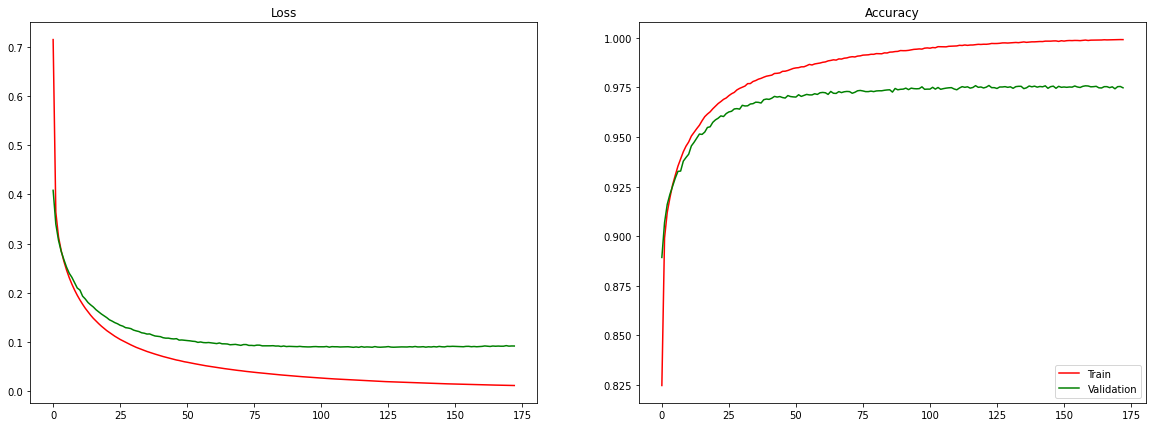

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ SoftPLus

accuracy: 0.9739

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='softplus', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
output (Dense)               (None, 10)                890       
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3483 - accuracy: 0.6586 - val_loss: 0.4675 - val_accuracy: 0.8742

Epoch 00001: val_accuracy improved from -inf to 0.87425, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4376 - accuracy: 0.8799 - val_loss: 0.3751 - val_accuracy: 0.8948

Epoch 00002: val_accuracy improved from 0.87425 to 0.89483, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3611 - accuracy: 0.8972 - val_loss: 0.3453 - val_accuracy: 0.9022

Epoch 00003: val_accuracy improved from 0.89483 to 0.90217, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.9030 - val_loss: 0.3246 - val_accuracy: 0.9083

Epoch 00004: val_accuracy improved from 0.90217 to 0.90833, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9944
Accuracy for the training set: 0.994350016117096
313/313 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9739
Accuracy for the testing set: 0.9739000201225281


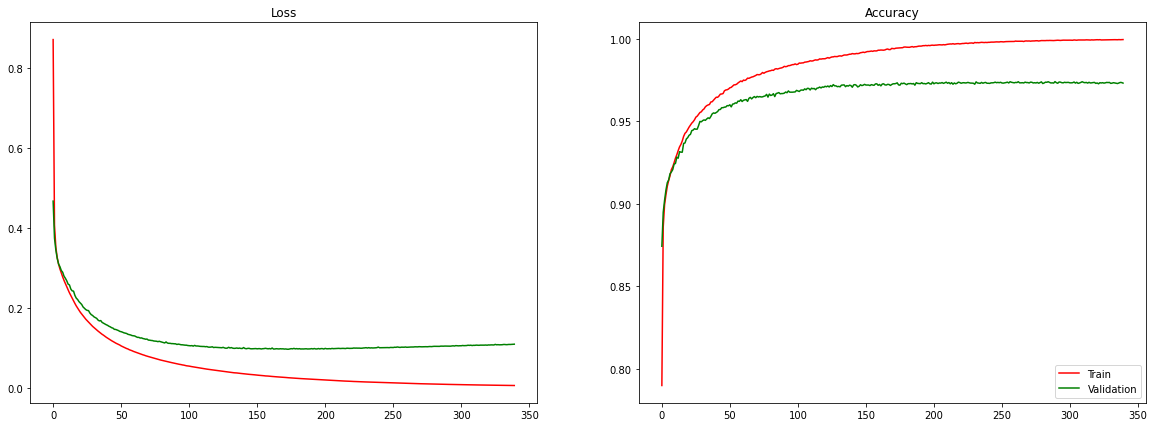

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

## Comparations Hideen Layers


### 88 Hidden Units w/ 2 Layers

accuracy: 0.9775

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden'),
    tf.keras.layers.Dense(44, activation='sigmoid', name='hidden2'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
hidden2 (Dense)              (None, 44)                3916      
_________________________________________________________________
output (Dense)               (None, 10)                450       
Total params: 73,446
Trainable params: 73,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.2236 - accuracy: 0.3284 - val_loss: 2.1147 - val_accuracy: 0.5602

Epoch 00001: val_accuracy improved from -inf to 0.56025, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 1.9233 - accuracy: 0.5750 - val_loss: 1.6874 - val_accuracy: 0.6413

Epoch 00002: val_accuracy improved from 0.56025 to 0.64133, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 1.4384 - accuracy: 0.6710 - val_loss: 1.2116 - val_accuracy: 0.7145

Epoch 00003: val_accuracy improved from 0.64133 to 0.71450, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 1.0544 - accuracy: 0.7489 - val_loss: 0.9224 - val_accuracy: 0.7757

Epoch 00004: val_accuracy improved from 0.71450 to 0.77575, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9944
Accuracy for the training set: 0.9943666458129883
313/313 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9775
Accuracy for the testing set: 0.9775000214576721


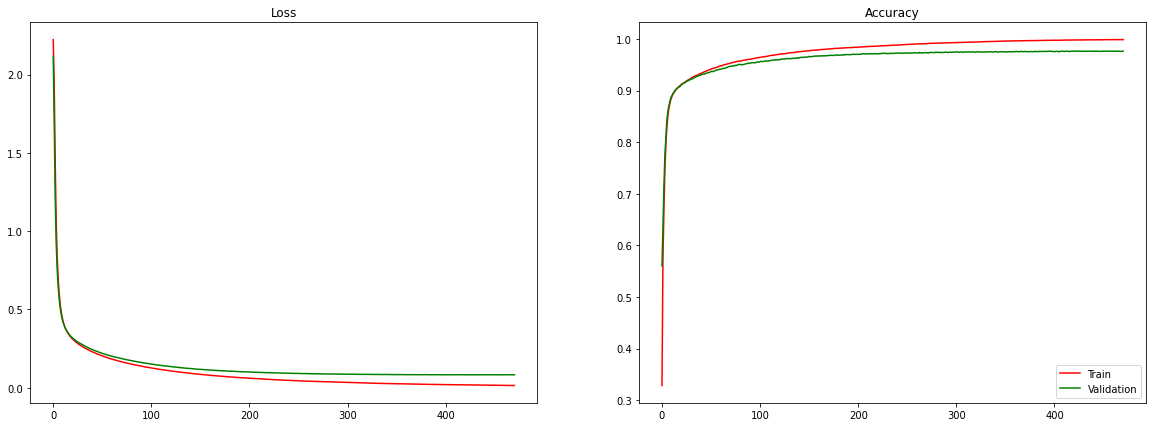

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ 4 Layers

accuracy: 0.9714

In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden'),
    tf.keras.layers.Dense(44, activation='sigmoid', name='hidden2'),
    tf.keras.layers.Dense(22, activation='sigmoid', name='hidden3'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
hidden2 (Dense)              (None, 44)                3916      
_________________________________________________________________
hidden3 (Dense)              (None, 22)                990       
_________________________________________________________________
output (Dense)               (None, 10)                230       
Total params: 74,216
Trainable params: 74,216
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3049 - accuracy: 0.1115 - val_loss: 2.2951 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2920 - accuracy: 0.1144 - val_loss: 2.2882 - val_accuracy: 0.1128

Epoch 00002: val_accuracy did not improve from 0.11275
Epoch 3/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2834 - accuracy: 0.1418 - val_loss: 2.2775 - val_accuracy: 0.1128

Epoch 00003: val_accuracy did not improve from 0.11275
Epoch 4/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2693 - accuracy: 0.1625 - val_loss: 2.2586 - val_accuracy: 0.1818

Epoch 00004: val_accuracy improved from 0.11275 to 0.18183, saving model to multi_layer_reg_best_softmax.h5
Epoch 5/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2412

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0271 - accuracy: 0.9944
Accuracy for the training set: 0.9944499731063843
313/313 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9714
Accuracy for the testing set: 0.9714000225067139


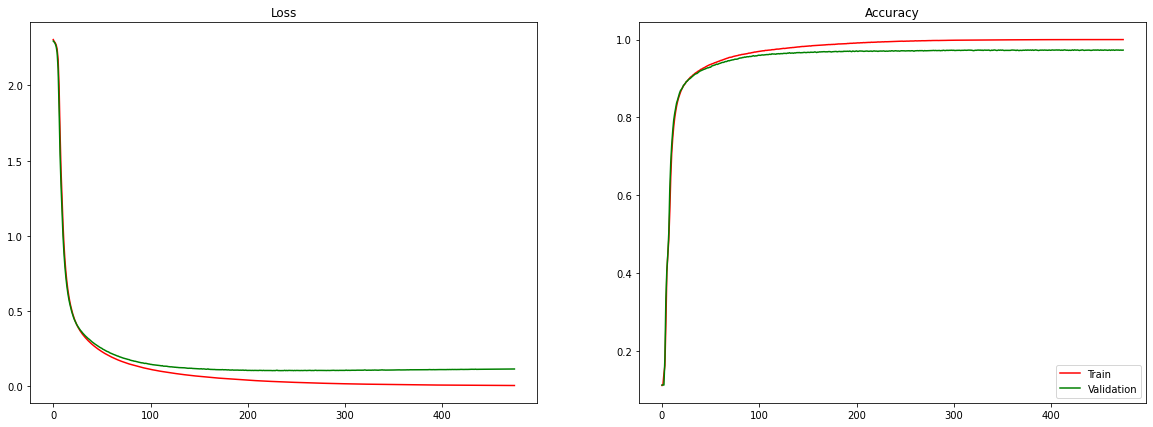

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ 4 Layers

accuracy: 0.9726


In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden'),
    tf.keras.layers.Dense(44, activation='sigmoid', name='hidden2'),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden3'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
hidden2 (Dense)              (None, 44)                3916      
_________________________________________________________________
hidden3 (Dense)              (None, 88)                3960      
_________________________________________________________________
output (Dense)               (None, 10)                890       
Total params: 77,846
Trainable params: 77,846
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3016 - accuracy: 0.1173 - val_loss: 2.2950 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2906 - accuracy: 0.1416 - val_loss: 2.2853 - val_accuracy: 0.1128

Epoch 00002: val_accuracy did not improve from 0.11275
Epoch 3/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2783 - accuracy: 0.1728 - val_loss: 2.2689 - val_accuracy: 0.2039

Epoch 00003: val_accuracy improved from 0.11275 to 0.20392, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 2s 2ms/step - loss: 2.2535 - accuracy: 0.2407 - val_loss: 2.2319 - val_accuracy: 0.2833

Epoch 00004: val_accuracy improved from 0.20392 to 0.28325, saving model to multi_layer_reg_best_softmax.h5
Epoch 5/10000
1500/1500 [=======

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0289 - accuracy: 0.9945
Accuracy for the training set: 0.994533360004425
313/313 [==============================] - 1s 1ms/step - loss: 0.1049 - accuracy: 0.9726
Accuracy for the testing set: 0.972599983215332


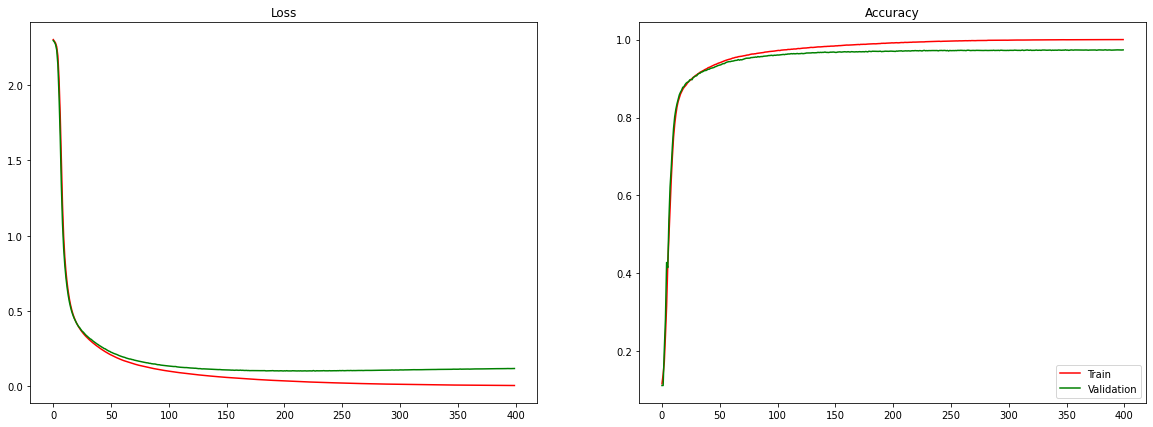

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ 5 Layers

accuracy: 0.9635


In [ ]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden'),
    tf.keras.layers.Dense(44, activation='sigmoid', name='hidden2'),
    tf.keras.layers.Dense(88, activation='sigmoid', name='hidden3'),
    tf.keras.layers.Dense(44, activation='sigmoid', name='hidden4'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
hidden2 (Dense)              (None, 44)                3916      
_________________________________________________________________
hidden3 (Dense)              (None, 88)                3960      
_________________________________________________________________
hidden4 (Dense)              (None, 44)                3916      
_________________________________________________________________
output (Dense)               (None, 10)                450       
Total params: 81,322
Trainable params: 81,322
Non-trainable params: 0
____________________________________________________

In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3054 - accuracy: 0.1090 - val_loss: 2.3018 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3022 - accuracy: 0.1112 - val_loss: 2.3017 - val_accuracy: 0.1052

Epoch 00002: val_accuracy did not improve from 0.11275
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3017 - accuracy: 0.1114 - val_loss: 2.3009 - val_accuracy: 0.1128

Epoch 00003: val_accuracy did not improve from 0.11275
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3007 - val_accuracy: 0.1128

Epoch 00004: val_accuracy did not improve from 0.11275
Epoch 5/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3006 - accuracy: 0.1158 - val_loss: 2.2999 - val_accuracy

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0417 - accuracy: 0.9925
Accuracy for the training set: 0.9924833178520203
313/313 [==============================] - 1s 2ms/step - loss: 0.1860 - accuracy: 0.9635
Accuracy for the testing set: 0.9635000228881836


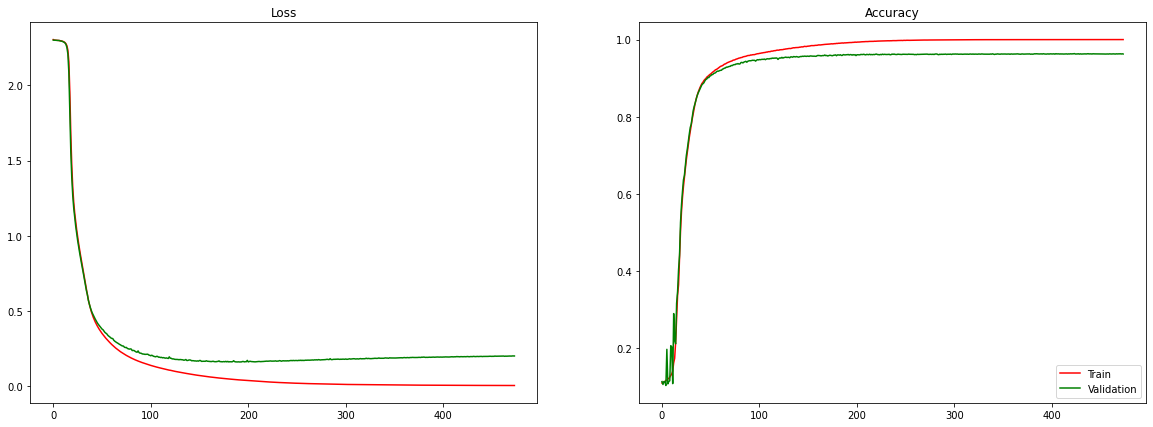

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

## Comparations Regularizations


### 88 Hidden Units w/ 2 Layers W/ l2 reg

accuracy: 0.9775

In [9]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid',  kernel_regularizer=tf.keras.regularizers.l2(0.01), name='hidden'),
    tf.keras.layers.Dense(44, activation='sigmoid',  name='hidden2'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
hidden2 (Dense)              (None, 44)                3916      
_________________________________________________________________
output (Dense)               (None, 10)                450       
Total params: 73,446
Trainable params: 73,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 3.4291 - accuracy: 0.3121 - val_loss: 3.0230 - val_accuracy: 0.4199

Epoch 00001: val_accuracy improved from -inf to 0.41992, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.6729 - accuracy: 0.5235 - val_loss: 2.3248 - val_accuracy: 0.5911

Epoch 00002: val_accuracy improved from 0.41992 to 0.59108, saving model to multi_layer_reg_best_softmax.h5
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0070 - accuracy: 0.6096 - val_loss: 1.7233 - val_accuracy: 0.6651

Epoch 00003: val_accuracy improved from 0.59108 to 0.66508, saving model to multi_layer_reg_best_softmax.h5
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5281 - accuracy: 0.6976 - val_loss: 1.3622 - val_accuracy: 0.7537

Epoch 00004: val_accuracy improved from 0.66508 to 0.75367, saving model to multi_layer

In [ ]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 

### 88 Hidden Units w/ 2 Layers W/ l1 reg

accuracy: 0.9775

In [26]:
multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(88, activation='sigmoid',  kernel_regularizer=tf.keras.regularizers.l1(0.01), name='hidden'),
    tf.keras.layers.Dense(44, activation='sigmoid',  name='hidden2'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 88)                69080     
_________________________________________________________________
hidden2 (Dense)              (None, 44)                3916      
_________________________________________________________________
output (Dense)               (None, 10)                450       
Total params: 73,446
Trainable params: 73,446
Non-trainable params: 0
_________________________________________________________________


In [27]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best_softmax.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 9.5152 - accuracy: 0.1142 - val_loss: 2.7013 - val_accuracy: 0.1128

Epoch 00001: val_accuracy improved from -inf to 0.11275, saving model to multi_layer_reg_best_softmax.h5
Epoch 2/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3907 - accuracy: 0.1113 - val_loss: 2.3386 - val_accuracy: 0.1128

Epoch 00002: val_accuracy did not improve from 0.11275
Epoch 3/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3390 - accuracy: 0.1098 - val_loss: 2.3386 - val_accuracy: 0.1128

Epoch 00003: val_accuracy did not improve from 0.11275
Epoch 4/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3389 - accuracy: 0.1104 - val_loss: 2.3386 - val_accuracy: 0.1128

Epoch 00004: val_accuracy did not improve from 0.11275
Epoch 5/10000
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3389 - accuracy: 0.1119 - val_loss: 2.3383 - val_accuracy

In [28]:
predictions=multi_layer_reg_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
#print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = multi_layer_reg_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = multi_layer_reg_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

1875/1875 [==============================] - 2s 1ms/step - loss: 2.3388 - accuracy: 0.1124
Accuracy for the training set: 0.11236666887998581
313/313 [==============================] - 1s 2ms/step - loss: 2.3387 - accuracy: 0.1135
Accuracy for the testing set: 0.11349999904632568


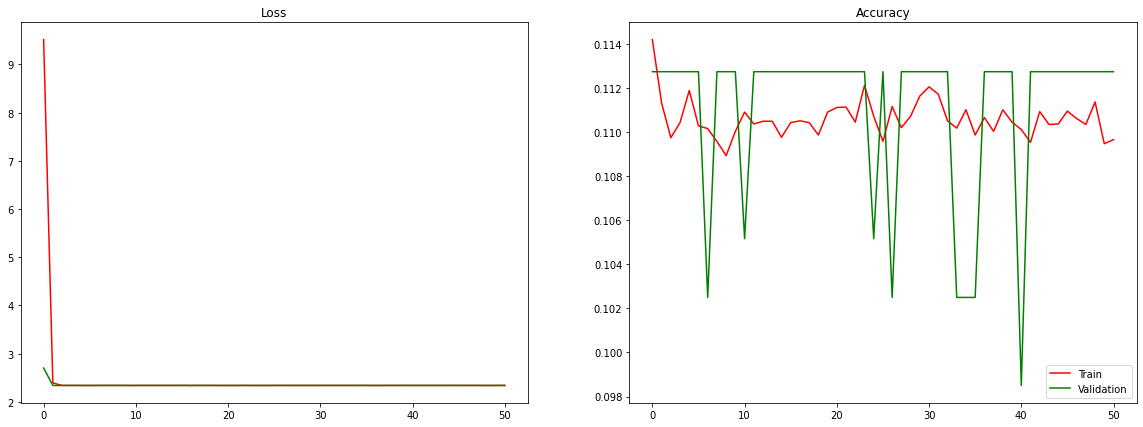

In [29]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show() 